In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pickle
import clean_data
import random

In [2]:
import train

configurations = {
    'model_identifier' : "full_1",
    'model_path' : './data',
    'device' : 'cpu',
    'random_seed' : 0,
    'lr' : 0.01,
    'momentum' : 0.9,
    'weight_decay' : 1e-6,
    'max_epochs' : 100,
    'do_validate' : True,
    'model_definition' : {
        'layer1' : 50, 'relu1' : True, #'drop1' : 0.2,
        'layer2' : 30, 'relu2' : True, #'drop2' : 0.2,
        'layer3' : 30, 'relu3' : True, #'drop3' : 0.2,
        'layer4' : 30, 'relu4' : True, #'drop4' : 0.5,
        'layer5' : 20, 'relu5' : True, #'drop5' : 0.5,
        'layer6' : 20, 'relu6' : True, #'drop6' : 0.5,
        'layer7' : 20, 'relu7' : True, #'drop7' : 0.5,
        'layer8' : 10, 'relu8' : True, #'drop8' : 0.5,
        'layer9' : 10, 'relu9' : True, #'drop9' : 0.5,
    },
    'train_params' : {
        'batch_size': 2000,
        'shuffle': True,
        'num_workers': 2,
        'pin_memory': True,
    },
    'test_params' : {
        'batch_size': 20000,
        'num_workers': 2,
        'pin_memory': True,
    },
}

Loading existing model


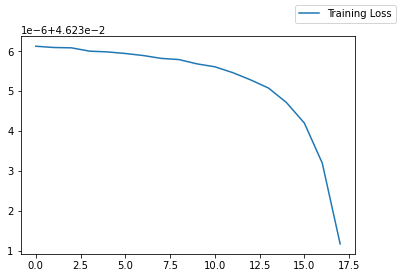

In [3]:
model, _, _, mean_losses, _ = train.load_model_with_config(configurations)
    
tl, vl = zip(*mean_losses)

fig,ax = plt.subplots()
ax.plot(tl[1:], label="Training Loss")
# ax.plot(vl, label="Validation Loss")

fig.legend()
plt.show()

In [4]:
X_test = pd.read_pickle('data/x_test1.pkl')
y_test = pd.read_pickle('data/y_test1.pkl')

In [5]:
cols = ['BSTAR', 'INCLINATION', 'RA_OF_ASC_NODE', 'ECCENTRICITY',
       'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'MEAN_MOTION', 'SUNSPOTS_1D',
       'SUNSPOTS_3D', 'SUNSPOTS_7D', 'AIR_MONTH_AVG_TEMP',
       'WATER_MONTH_AVG_TEMP', 'year', 'month_sin', 'month_cos', 'hour_sin',
       'hour_cos', 'minute_sin', 'minute_cos', 'second_sin', 'second_cos',
       'ms_sin', 'ms_cos', 'year_y', 'month_sin_y', 'month_cos_y',
       'hour_sin_y', 'hour_cos_y', 'minute_sin_y', 'minute_cos_y',
       'second_sin_y', 'second_cos_y', 'ms_sin_y', 'ms_cos_y',
       'epoch_day_diff', 'epoch_sec_diff', 'epoch_ms_diff']

results = train.predict(model, X_test[cols], y_test)

array([<AxesSubplot:xlabel='EPOCH'>, <AxesSubplot:xlabel='EPOCH'>,
       <AxesSubplot:xlabel='EPOCH'>, <AxesSubplot:xlabel='EPOCH'>,
       <AxesSubplot:xlabel='EPOCH'>, <AxesSubplot:xlabel='EPOCH'>],
      dtype=object)

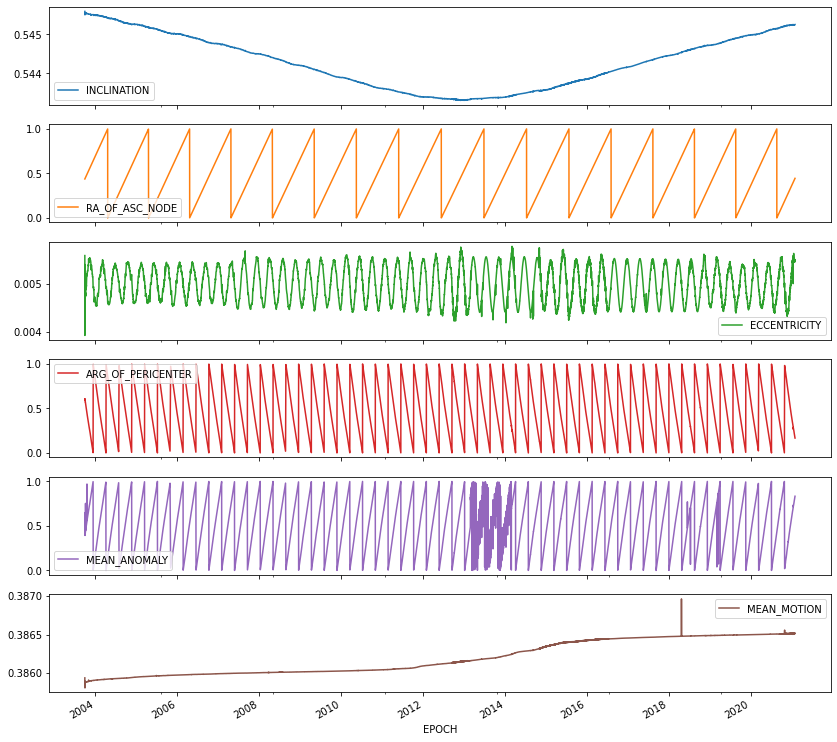

In [6]:
cols = ['INCLINATION','RA_OF_ASC_NODE', 'ECCENTRICITY', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'MEAN_MOTION']
X_test_27944 = X_test[X_test.NORAD_CAT_ID == 27944]
X_test_27944_idx = X_test_27944.index
X_test_27944.set_index('EPOCH')[cols].plot(figsize=[14,14], subplots=True)

array([<AxesSubplot:xlabel='EPOCH'>, <AxesSubplot:xlabel='EPOCH'>,
       <AxesSubplot:xlabel='EPOCH'>, <AxesSubplot:xlabel='EPOCH'>,
       <AxesSubplot:xlabel='EPOCH'>, <AxesSubplot:xlabel='EPOCH'>],
      dtype=object)

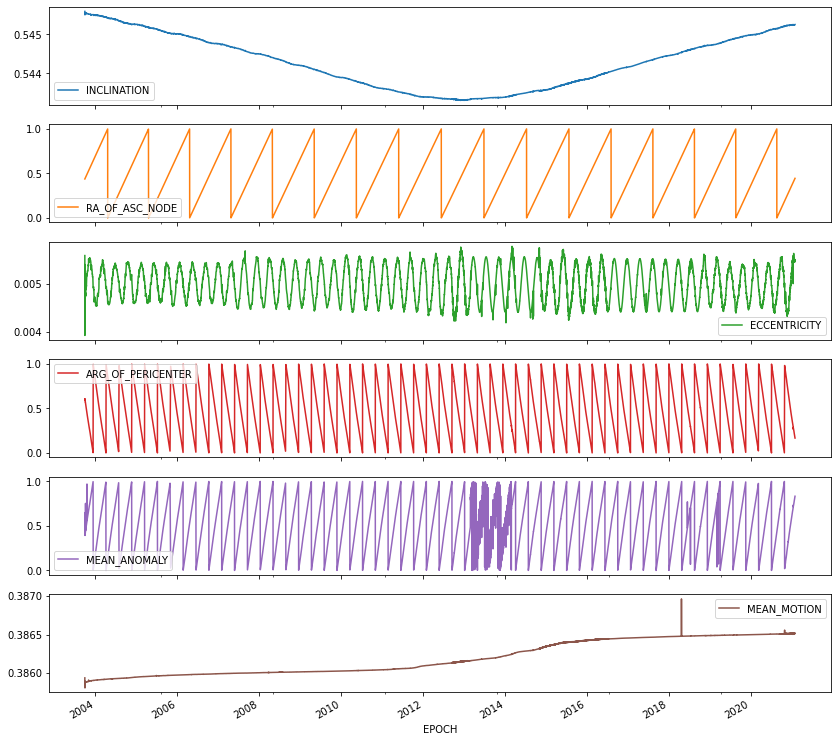

In [7]:
y_test_27944 = y_test.loc[X_test_27944_idx]
y_test_27944['EPOCH'] = X_test_27944['EPOCH_y']
y_test_27944.set_index('EPOCH')[cols].plot(figsize=[14,14], subplots=True)

array([<AxesSubplot:xlabel='EPOCH'>, <AxesSubplot:xlabel='EPOCH'>,
       <AxesSubplot:xlabel='EPOCH'>, <AxesSubplot:xlabel='EPOCH'>,
       <AxesSubplot:xlabel='EPOCH'>, <AxesSubplot:xlabel='EPOCH'>],
      dtype=object)

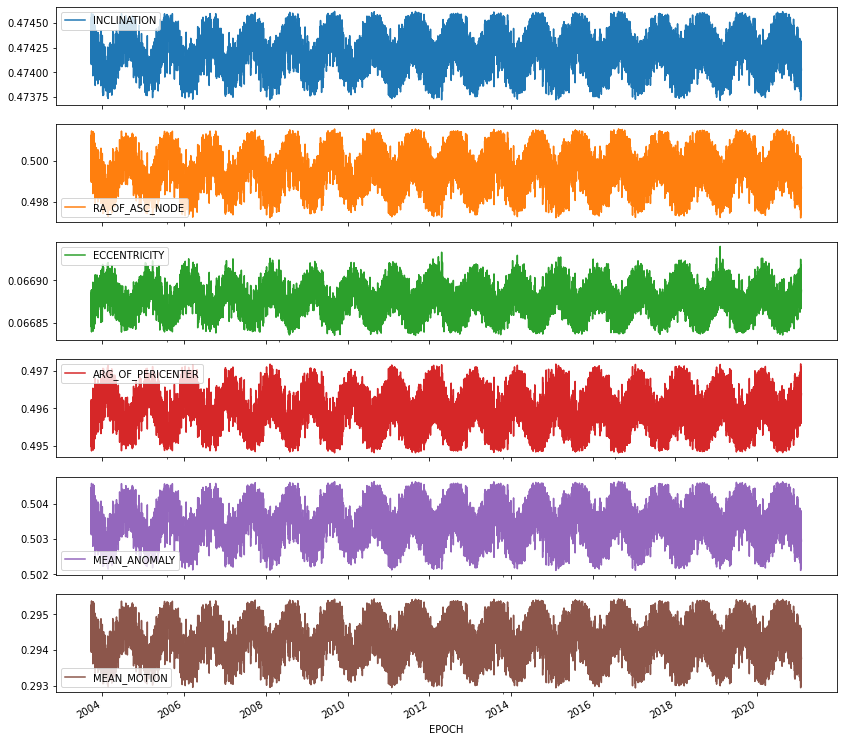

In [8]:
y_pred_27944 = pd.DataFrame(results, columns=cols).loc[X_test_27944_idx]
y_pred_27944['EPOCH'] = X_test_27944['EPOCH_y']
y_pred_27944.set_index('EPOCH')[cols].plot(figsize=[14,14], subplots=True)